# PROJECT: 2015 FLIGHT DELAYS
## David Forteguerre

In [1]:
# to change directories
import os
os.chdir("/Users/davidforteguerre/Downloads/data_FlightDelays")

# to import relevant packages
import numpy as np
import pandas as pd
from datetime import datetime # will maybe use
import seaborn as sns
import matplotlib.pyplot as plt

# to adjust a few settings
pd.set_option('display.max_columns', None) # to make sure that all columns of pandas dataset are displayed (FOR JUPYTER NOTEBOOK)
##pd.set_option('expand_frame_repr', False) # to make sure that all columns of pandas dataset are displayed (FOR RODEO)

# I. DATA EXPLORATION AND CLEANING

In [2]:
# to import data using pandas
datasetAirlines = pd.read_csv('airlines.csv')
datasetAirports = pd.read_csv('airports.csv')
datasetFlights = pd.read_csv('flights.csv', low_memory=False) # used low_memory=False to avoid getting the warning: DtypeWarning: Columns (7,8) have mixed types

# NOTE: dataset is available at https://www.kaggle.com/usdot/flight-delays/version/1#flights.csv

In [3]:
# to get info about the data and its structure
print("\nAIRLINES DATASET OVERVIEW:")
print("rows:", datasetAirlines.shape[0], "columns:", datasetAirlines.shape[1])
##datasetAirlines.info() # general way containing nice and useful information

print("\nAIRPORTS DATASET OVERVIEW:")
print("rows:", datasetAirports.shape[0], "columns:", datasetAirports.shape[1])
##datasetAirports.info()

print("\nFLIGHTS DATASET OVERVIEW:")
print("rows:", datasetFlights.shape[0], "columns:", datasetFlights.shape[1])
#datasetFlights.info()


AIRLINES DATASET OVERVIEW:
rows: 14 columns: 2

AIRPORTS DATASET OVERVIEW:
rows: 322 columns: 7

FLIGHTS DATASET OVERVIEW:
rows: 5819079 columns: 31


### To clean the Flights Dataset

In [4]:
# to drop redundant, useless, or irrelevant columns
datasetFlights = datasetFlights.drop('YEAR', axis=1)
datasetFlights = datasetFlights.drop('FLIGHT_NUMBER', axis=1)
datasetFlights = datasetFlights.drop('TAIL_NUMBER', axis=1)
datasetFlights = datasetFlights.drop('DEPARTURE_TIME', axis=1)
datasetFlights = datasetFlights.drop('TAXI_OUT', axis=1)
datasetFlights = datasetFlights.drop('WHEELS_OFF', axis=1)
datasetFlights = datasetFlights.drop('SCHEDULED_TIME', axis=1)
datasetFlights = datasetFlights.drop('ELAPSED_TIME', axis=1)
datasetFlights = datasetFlights.drop('AIR_TIME', axis=1)
datasetFlights = datasetFlights.drop('WHEELS_ON', axis=1)
datasetFlights = datasetFlights.drop('TAXI_IN', axis=1)
datasetFlights = datasetFlights.drop('ARRIVAL_TIME', axis=1)
datasetFlights = datasetFlights.drop('DIVERTED', axis=1)

# to create a new column "status" that can be: cancelled, on time, or delayed
datasetFlights.loc[datasetFlights['CANCELLED'] == 1, 'STATUS'] = 'cancelled'
datasetFlights.loc[datasetFlights['ARRIVAL_DELAY'] < 15, 'STATUS'] = 'on time'
datasetFlights.loc[datasetFlights['ARRIVAL_DELAY'] >= 15, 'STATUS'] = 'delayed'

# to turn times into bins following this model (0-559 --> night, 600-1159 --> morning, 1200-1759 --> afternoon, 1800-2359 --> evening)
datasetFlights['SCHEDULED_DEPARTURE'] = pd.cut(datasetFlights.SCHEDULED_DEPARTURE, bins=[0,600,1200,1800, 2359], labels=["night","morning","afternoon","evening"])
datasetFlights['SCHEDULED_ARRIVAL'] = pd.cut(datasetFlights.SCHEDULED_ARRIVAL, bins=[0,600,1200,1800, 2359], labels=["night","morning","afternoon","evening"])

# to turn flight distances into 500 miles long bins:
datasetFlights['DISTANCE'] = pd.cut(datasetFlights.DISTANCE, bins=[0,500,1000,1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], labels=["0-500","500-1000","1000-1500","1500-2000", "2000-2500", "2500-3000", "3000-3500", "3500-4000","4000-4500", "4500-5000"])

# to reorder columns
datasetFlights = datasetFlights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'STATUS', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

# to rename columns
datasetFlights.rename(columns={'ORIGIN_AIRPORT':'ORIGIN'}, inplace=True)
datasetFlights.rename(columns={'DESTINATION_AIRPORT':'DESTINATION'}, inplace=True)
datasetFlights.rename(columns={'DISTANCE':'FLIGHT_DISTANCE'}, inplace=True)
datasetFlights.rename(columns={'AIR_SYSTEM_DELAY':'AIR_SYSTEM_D'}, inplace=True)
datasetFlights.rename(columns={'SECURITY_DELAY':'SECURITY_D'}, inplace=True)
datasetFlights.rename(columns={'AIRLINE_DELAY':'AIRLINE_D'}, inplace=True)
datasetFlights.rename(columns={'LATE_AIRCRAFT_DELAY':'LATE_AIRCRAFT_D'}, inplace=True)
datasetFlights.rename(columns={'WEATHER_DELAY':'WEATHER_D'}, inplace=True)

In [5]:
# to drop rows with missing value in SCHEDULED_ARRIVAL and STATUS
datasetFlights = datasetFlights.dropna(subset = ['SCHEDULED_ARRIVAL'])
datasetFlights = datasetFlights.dropna(subset = ['STATUS'])

# to check for missing values
print("There are NA's in the data:", datasetFlights.isnull().values.any())
print(datasetFlights.isnull().sum())

# The other NA's will be taken care of below.

There are NA's in the data: True
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN                       0
DESTINATION                  0
FLIGHT_DISTANCE              0
SCHEDULED_DEPARTURE          0
SCHEDULED_ARRIVAL            0
STATUS                       0
DEPARTURE_DELAY          86153
ARRIVAL_DELAY            89884
CANCELLED                    0
CANCELLATION_REASON    5714007
AIR_SYSTEM_D           4740453
SECURITY_D             4740453
AIRLINE_D              4740453
LATE_AIRCRAFT_D        4740453
WEATHER_D              4740453
dtype: int64


In [6]:
# to preview the refined Flights Dataset
display(datasetFlights.head(n=5))

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_D,SECURITY_D,AIRLINE_D,LATE_AIRCRAFT_D,WEATHER_D
0,1,1,4,AS,ANC,SEA,1000-1500,night,night,on time,-11.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,AA,LAX,PBI,2000-2500,night,morning,on time,-8.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,4,US,SFO,CLT,2000-2500,night,morning,on time,-2.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,4,AA,LAX,MIA,2000-2500,night,morning,on time,-5.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,4,AS,SEA,ANC,1000-1500,night,night,on time,-1.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


### To create a new dataset from the Flights Dataset: Delays and Reasons

In [7]:
# DATASET: DELAYS AND REASONS


# Note that the original dataset contained many more delayed flights. Here, only the ones that have an actual explicit reason for the delay will be output.

# to create a new dataframe with delays and their reasons 
datasetFlightsDelayReasons = datasetFlights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN', 'DESTINATION', 'FLIGHT_DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'STATUS', 'AIR_SYSTEM_D', 'SECURITY_D', 'AIRLINE_D', 'LATE_AIRCRAFT_D', 'WEATHER_D']]

# to drop row if it does not have at least 11 values that are NOT missing values (since the first 10 columns do NOT have missing values, this will drop cancelled flights AND any rows that does not have more info about the nature of the delay (see last 5 columns))
datasetFlightsDelayReasons = datasetFlightsDelayReasons.dropna(thresh=11) 

# to view if there is any missing data by returning a boolean
print("There are NA's in the data:", datasetFlightsDelayReasons.isnull().values.any())
## print(datasetFlightsDelayReasons.isnull().sum())

# to see how many rows and columns there are
print("rows:", datasetFlightsDelayReasons.shape[0])
print("columns:", datasetFlightsDelayReasons.shape[1])

# to view dataset
display(datasetFlightsDelayReasons.head(n=5))

There are NA's in the data: False
rows: 1063438
columns: 15


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,AIR_SYSTEM_D,SECURITY_D,AIRLINE_D,LATE_AIRCRAFT_D,WEATHER_D
27,1,1,4,NK,MSP,FLL,1000-1500,night,night,delayed,25.0,0.0,0.0,0.0,0.0
30,1,1,4,NK,PHX,ORD,1000-1500,night,night,delayed,43.0,0.0,0.0,0.0,0.0
35,1,1,4,HA,LAS,HNL,2500-3000,night,night,delayed,0.0,0.0,15.0,0.0,0.0
50,1,1,4,B6,BQN,MCO,1000-1500,night,night,delayed,20.0,0.0,0.0,0.0,0.0
52,1,1,4,B6,SJU,MCO,1000-1500,night,morning,delayed,0.0,0.0,85.0,0.0,0.0


### To create a new dataset from the Flights Dataset: Cancellations and Reasons

In [8]:
# DATASET: CANCELLATIONS AND REASONS


# Note that all cancelled flights contained in the original dataset will be output, since EACH cancelled flight had a cancellation reason associated with it.

# to create a new dataframe with cancellations and their reasons 
datasetFlightsCancellationReasons = datasetFlights[['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN', 'DESTINATION', 'FLIGHT_DISTANCE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'STATUS', 'CANCELLED', 'CANCELLATION_REASON']]

# to only keep cancelled flights (the value being 1)
datasetFlightsCancellationReasons = datasetFlightsCancellationReasons[datasetFlightsCancellationReasons['CANCELLED'] == 1]

# to replace the cancellation reason letter by the actual reason (string)
datasetFlightsCancellationReasons['CANCELLATION_REASON'] = datasetFlightsCancellationReasons['CANCELLATION_REASON'].replace('A', 'airline/carrier')
datasetFlightsCancellationReasons['CANCELLATION_REASON'] = datasetFlightsCancellationReasons['CANCELLATION_REASON'].replace('B', 'weather')
datasetFlightsCancellationReasons['CANCELLATION_REASON'] = datasetFlightsCancellationReasons['CANCELLATION_REASON'].replace('C', 'national air system')
datasetFlightsCancellationReasons['CANCELLATION_REASON'] = datasetFlightsCancellationReasons['CANCELLATION_REASON'].replace('D', 'security')

# to drop irrelevant column
datasetFlightsCancellationReasons = datasetFlightsCancellationReasons.drop('CANCELLED', axis=1)

# to view if there is any missing data by returning a boolean
print("There are NA's in the data:", datasetFlightsCancellationReasons.isnull().values.any())
## print(datasetFlightsCancellationReasons.isnull().sum())

# to see how many rows and columns there are
print("rows:", datasetFlightsCancellationReasons.shape[0])
print("columns:", datasetFlightsCancellationReasons.shape[1])

# to view dataset
display(datasetFlightsCancellationReasons.head(n=5))

There are NA's in the data: False
rows: 89884
columns: 11


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,CANCELLATION_REASON
32,1,1,4,AS,ANC,SEA,1000-1500,night,night,cancelled,airline/carrier
42,1,1,4,AA,PHX,DFW,500-1000,night,night,cancelled,weather
68,1,1,4,OO,MAF,IAH,0-500,night,morning,cancelled,weather
82,1,1,4,MQ,SGF,DFW,0-500,night,morning,cancelled,weather
90,1,1,4,OO,RDD,SFO,0-500,night,morning,cancelled,airline/carrier


### To create a new dataset from the Flights Dataset: All Flights

In [9]:
# DATASET: ALL FLIGHTS

# to duplicate the dataset
datasetAllFlights = datasetFlights.copy()

# to only keep non-cancelled flights (the value being 0)
datasetAllFlights = datasetAllFlights[datasetAllFlights['CANCELLED'] == 0]

# to drop uncessary columns
datasetAllFlights = datasetAllFlights.drop('CANCELLED', axis=1)
datasetAllFlights = datasetAllFlights.drop('CANCELLATION_REASON', axis=1)
datasetAllFlights = datasetAllFlights.drop('AIR_SYSTEM_D', axis=1) 
datasetAllFlights = datasetAllFlights.drop('SECURITY_D', axis=1)
datasetAllFlights = datasetAllFlights.drop('AIRLINE_D', axis=1) 
datasetAllFlights = datasetAllFlights.drop('LATE_AIRCRAFT_D', axis=1)
datasetAllFlights = datasetAllFlights.drop('WEATHER_D', axis=1)

# to drop rows that have NA's
## datasetAllFlights = datasetAllFlights.dropna(subset = ['ARRIVAL_DELAY'])

# to view if there is any missing data by returning a boolean
print("There are NA's in the data:", datasetAllFlights.isnull().values.any())
##print(datasetAllFlights.isnull().sum())

# to see how many rows and columns there are
print("rows:", datasetAllFlights.shape[0])
print("columns:", datasetAllFlights.shape[1])

# to view dataset
display(datasetAllFlights.head(n=5))

There are NA's in the data: False
rows: 5714007
columns: 12


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,DEPARTURE_DELAY,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,1000-1500,night,night,on time,-11.0,-22.0
1,1,1,4,AA,LAX,PBI,2000-2500,night,morning,on time,-8.0,-9.0
2,1,1,4,US,SFO,CLT,2000-2500,night,morning,on time,-2.0,5.0
3,1,1,4,AA,LAX,MIA,2000-2500,night,morning,on time,-5.0,-9.0
4,1,1,4,AS,SEA,ANC,1000-1500,night,night,on time,-1.0,-21.0


### To create python dictionaries for airlines and airports using IATA codes

In [10]:
# for airlines
airlineNames = datasetAirlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
##type(airlineNames) 
print(airlineNames['B6']) # to test

# for airports
airportNames = datasetAirports.set_index('IATA_CODE')['AIRPORT'].to_dict()
##type(airlineNames)
print(airportNames['LAX']) # to test

JetBlue Airways
Los Angeles International Airport


### To see how much data we have before and after cleaning

In [11]:
print("\nData shape BEFORE cleansing:")
print(datasetFlights.shape)
print("\nData shape AFTER cleansing:")
print(datasetAllFlights.shape)


Data shape BEFORE cleansing:
(5803891, 19)

Data shape AFTER cleansing:
(5714007, 12)


# II. DATASETS OVERVIEW

In [12]:
# to preview first 5 records of each dataset
print("\n\nAIRLINES PREVIEW:")
print("rows:", datasetAirlines.shape[0])
print("columns:", datasetAirlines.shape[1])
display(datasetAirlines.head(n=5))

print("\n\nAIRPORTS PREVIEW:")
print("rows:", datasetAirports.shape[0])
print("columns:", datasetAirports.shape[1])
display(datasetAirports.head(n=5))

print("\n\nALL FLIGHTS PREVIEW:")
print("rows:", datasetAllFlights.shape[0])
print("columns:", datasetAllFlights.shape[1])
display(datasetAllFlights.head(n=5))

print("\n\nDELAY REASONS PREVIEW:")
print("rows:", datasetFlightsDelayReasons.shape[0])
print("columns:", datasetFlightsDelayReasons.shape[1])
display(datasetFlightsDelayReasons.head(n=5))

print("\n\nCANCELLATION REASONS PREVIEW:")
print("rows:", datasetFlightsCancellationReasons.shape[0])
print("columns:", datasetFlightsCancellationReasons.shape[1])
display(datasetFlightsCancellationReasons.head(n=5))



AIRLINES PREVIEW:
rows: 14
columns: 2


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways




AIRPORTS PREVIEW:
rows: 322
columns: 7


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447




ALL FLIGHTS PREVIEW:
rows: 5714007
columns: 12


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,DEPARTURE_DELAY,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,1000-1500,night,night,on time,-11.0,-22.0
1,1,1,4,AA,LAX,PBI,2000-2500,night,morning,on time,-8.0,-9.0
2,1,1,4,US,SFO,CLT,2000-2500,night,morning,on time,-2.0,5.0
3,1,1,4,AA,LAX,MIA,2000-2500,night,morning,on time,-5.0,-9.0
4,1,1,4,AS,SEA,ANC,1000-1500,night,night,on time,-1.0,-21.0




DELAY REASONS PREVIEW:
rows: 1063438
columns: 15


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,AIR_SYSTEM_D,SECURITY_D,AIRLINE_D,LATE_AIRCRAFT_D,WEATHER_D
27,1,1,4,NK,MSP,FLL,1000-1500,night,night,delayed,25.0,0.0,0.0,0.0,0.0
30,1,1,4,NK,PHX,ORD,1000-1500,night,night,delayed,43.0,0.0,0.0,0.0,0.0
35,1,1,4,HA,LAS,HNL,2500-3000,night,night,delayed,0.0,0.0,15.0,0.0,0.0
50,1,1,4,B6,BQN,MCO,1000-1500,night,night,delayed,20.0,0.0,0.0,0.0,0.0
52,1,1,4,B6,SJU,MCO,1000-1500,night,morning,delayed,0.0,0.0,85.0,0.0,0.0




CANCELLATION REASONS PREVIEW:
rows: 89884
columns: 11


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN,DESTINATION,FLIGHT_DISTANCE,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,STATUS,CANCELLATION_REASON
32,1,1,4,AS,ANC,SEA,1000-1500,night,night,cancelled,airline/carrier
42,1,1,4,AA,PHX,DFW,500-1000,night,night,cancelled,weather
68,1,1,4,OO,MAF,IAH,0-500,night,morning,cancelled,weather
82,1,1,4,MQ,SGF,DFW,0-500,night,morning,cancelled,weather
90,1,1,4,OO,RDD,SFO,0-500,night,morning,cancelled,airline/carrier


In [13]:
# to save the new clean datasets to local drive
##datasetAirlines.to_csv('data_AirlinesCLEAN.csv', index=True, header=True)
##datasetAirports.to_csv('data_AirportsCLEAN.csv', index=True, header=True)
##datasetAllFlights.to_csv('data_AllFlightsCLEAN.csv', index=True, header=True)
##datasetFlightsDelayReasons.to_csv('data_FlightsDelayReasonsCLEAN.csv', index=True, header=True)
##datasetFlightsCancellationReasons.to_csv('data_FlightsCancellationReasonsCLEAN.csv', index=True, header=True)

# III. DATA DESCRIPTIVE ANALYSIS/SUMMARY STATISTICS

### What are the busiest airports and airlines in the data in terms of flight numbers?

In [14]:
# What are the 10 busiest airports in the dataset in terms of flight departures?

allairports = datasetAllFlights['ORIGIN'].value_counts()
allairports = pd.DataFrame(allairports) # to convert to a dataframe
allairports.rename(columns={'ORIGIN':'COUNT'}, inplace=True)
allairports.reset_index(inplace=True)
allairports = allairports.replace({"index": airportNames}) # 

# to view
print("\n10 busiest airports in the data:")
display(allairports.head(n=10))


10 busiest airports in the data:


,index,COUNT
0,Hartsfield-Jackson Atlanta International Airport,343506
1,Chicago O'Hare International Airport,276554
2,Dallas/Fort Worth International Airport,232647
3,Denver International Airport,193402
4,Los Angeles International Airport,192003
5,Phoenix Sky Harbor International Airport,145552
6,San Francisco International Airport,145491
7,George Bush Intercontinental Airport,144019
8,McCarran International Airport,131937
9,Minneapolis-Saint Paul International Airport,111055


In [15]:
# What are the 10 busiest airlines in the dataset in terms of flight departures?

allairlines = datasetAllFlights['AIRLINE'].value_counts()
allairlines = pd.DataFrame(allairlines) # to convert to a dataframe
allairlines.rename(columns={'AIRLINE':'COUNT'}, inplace=True)
allairlines.reset_index(inplace=True)
allairlines = allairlines.replace({"index": airlineNames}) # 

# to view
print("\n10 busiest airlines in the data:")
display(allairlines.head(n=10))


# to plot the overall number of flights per airline
##sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
##plt.figure(figsize=(10,5)) # to change size of graph
##sns.countplot(x="index", data=allairlines, order = datasetAllFlights['AIRLINE'].value_counts().index) # we are ordering the columns here in descending order
##plt.xticks(rotation= 90) # to rotate labels on x axis
##plt.xlabel('Airline') # to name x label
##plt.ylabel('Count') # to name y label
##plt.title('2015 OVERALL NUMBER OF FLIGHTS PER AIRLINE') # to add a title to plot
##plt.show() # to plot


10 busiest airlines in the data:


,index,COUNT
0,Southwest Airlines Co.,1242403
1,Delta Air Lines Inc.,870275
2,American Airlines Inc.,712935
3,Skywest Airlines Inc.,576814
4,Atlantic Southeast Airlines,554752
5,United Air Lines Inc.,507762
6,American Eagle Airlines Inc.,278791
7,JetBlue Airways,262042
8,US Airways Inc.,194223
9,Alaska Airlines Inc.,171439


### 1. Which airlines typically have significant flight delays?

In [16]:
# PART A: TO GET A STATS SUMMARY TABLE OF DELAYS PER AIRLINE (based on arrival delays, which account for the overall delay of a given flight)

# to get the count of delayed flights per airline
airlineDelayedCount = datasetAllFlights.groupby('AIRLINE')['STATUS'].value_counts()
airlineDelayedCount = airlineDelayedCount.drop(labels='on time', level=1) # to drop 2nd level label "on time" from this pandas multiIndex series
airlineDelayedCount.index = airlineDelayedCount.index.get_level_values(0) # to set the first index as the main index and drop the STATUS index

# to get the count of on time flights per airline
airlineOnTimeCount = datasetAllFlights.groupby('AIRLINE')['STATUS'].value_counts()
airlineOnTimeCount = airlineOnTimeCount.drop(labels='delayed', level=1) # to drop 1st level label "delayed" from this pandas multiIndex series
airlineOnTimeCount.index = airlineOnTimeCount.index.get_level_values(0) # to set the first index as the main index and drop the STATUS index

# to get the average, median, max, and min delay times per airline
airlineDelayMean = datasetAllFlights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean()
airlineDelayMedian = datasetAllFlights.groupby('AIRLINE')['ARRIVAL_DELAY'].median()
airlineDelayMax = datasetAllFlights.groupby('AIRLINE')['ARRIVAL_DELAY'].max()
airlineDelayMin = datasetAllFlights.groupby('AIRLINE')['ARRIVAL_DELAY'].min()

# to concatenate all results into a pandas dataframe
flightsStats = pd.DataFrame({'delayed flights count': airlineDelayedCount, 'on time flights count': airlineOnTimeCount, 'delay mean': airlineDelayMean, 'delay median': airlineDelayMedian, 'delay max': airlineDelayMax, 'delay min': airlineDelayMin})
flightsStats = flightsStats[['delayed flights count', 'on time flights count', 'delay mean', 'delay median', 'delay min', 'delay max']] # to reorder columns
flightsStats.reset_index(inplace=True) # to turn index into first column

# to replace airline IATA codes by full airline names using python dictionary previously created
flightsStats = flightsStats.replace({"AIRLINE": airlineNames})

# to add a column computing the percentage of delayed flights per airline (considering the number of flights operated by each airline)
flightsStats['percentage of delayed flights'] = (100*flightsStats['delayed flights count'])/flightsStats['on time flights count']
flightsStats['percentage of delayed flights'] = flightsStats['percentage of delayed flights'].round(2) # to round the values

# to view
print("Summary statistics per airline:")
display(flightsStats) 

Summary statistics per airline:


,AIRLINE,delayed flights count,on time flights count,delay mean,delay median,delay min,delay max,percentage of delayed flights
0,American Airlines Inc.,130279,582656,3.451372,-6.0,-87.0,1971.0,22.36
1,Alaska Airlines Inc.,22352,149087,-0.976563,-5.0,-82.0,950.0,14.99
2,JetBlue Airways,59175,202867,6.677861,-5.0,-76.0,1002.0,29.17
3,Delta Air Lines Inc.,118023,752252,0.186754,-8.0,-79.0,1274.0,15.69
4,Atlantic Southeast Airlines,109184,445568,6.585379,-4.0,-64.0,1223.0,24.50
5,Frontier Airlines Inc.,23569,66520,12.503913,-1.0,-73.0,1101.0,35.43
6,Hawaiian Airlines Inc.,8618,67423,2.023093,-2.0,-67.0,1467.0,12.78
7,American Eagle Airlines Inc.,60547,218244,6.457873,-6.0,-63.0,1528.0,27.74
8,Spirit Air Lines,34221,80972,14.471800,0.0,-60.0,833.0,42.26
9,Skywest Airlines Inc.,107795,469019,5.845652,-4.0,-69.0,1372.0,22.98


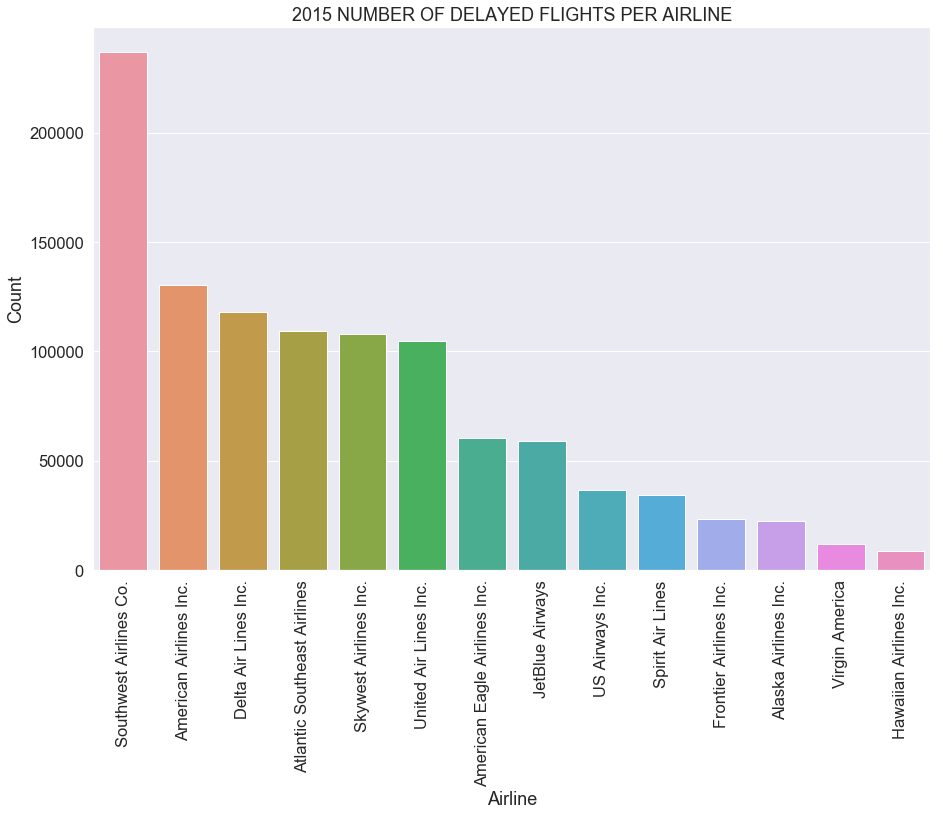

In [17]:
# to sort the dataset by the number of delayed flights per airline
flightsStats = flightsStats.sort_values(by='delayed flights count', ascending=False)
flightsStats = flightsStats.reset_index(drop=True) # to reindex starting at 0

# to plot the percentage of delayed flights per airline
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=flightsStats['AIRLINE'], y=flightsStats['delayed flights count']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Airline') # to name x label
plt.ylabel('Count') # to name y label
plt.title('2015 NUMBER OF DELAYED FLIGHTS PER AIRLINE') # to add a title to plot
plt.show() # to plot

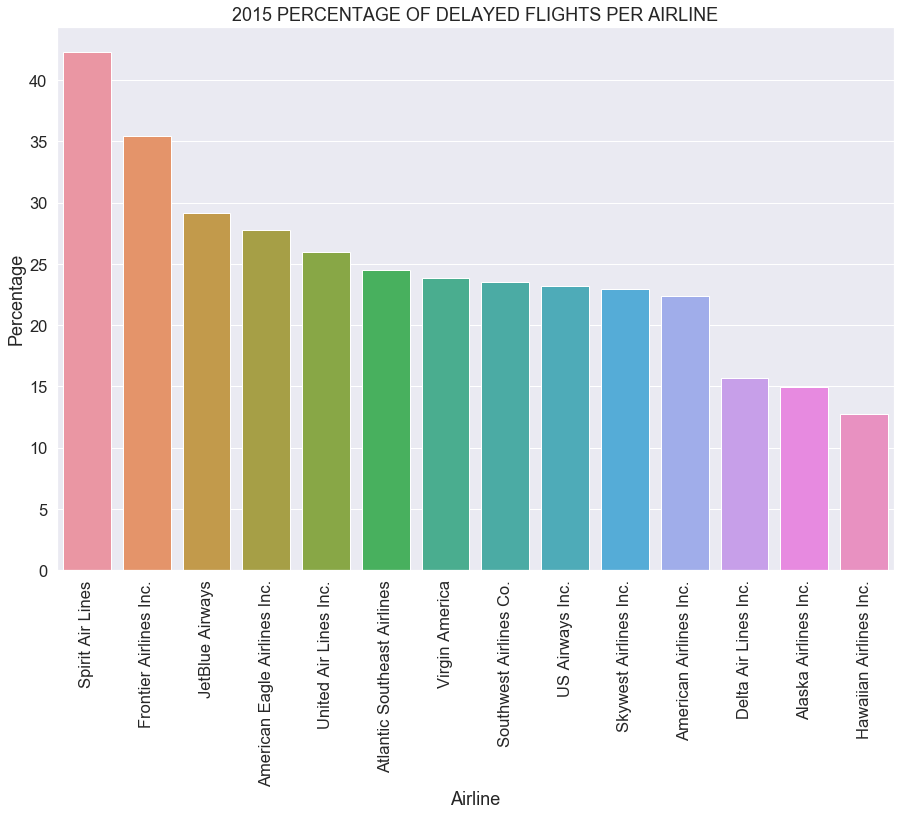

In [18]:
# to sort the dataset by the percentage of delayed flights per airline
flightsStats = flightsStats.sort_values(by='percentage of delayed flights', ascending=False)
flightsStats = flightsStats.reset_index(drop=True) # to reindex starting at 0

# to plot the percentage of delayed flights per airline
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=flightsStats['AIRLINE'], y=flightsStats['percentage of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Airline') # to name x label
plt.ylabel('Percentage') # to name y label
plt.title('2015 PERCENTAGE OF DELAYED FLIGHTS PER AIRLINE') # to add a title to plot
plt.show() # to plot

In [19]:
# PART B: TO PLOT DELAYS

# to create a new copy (using .copy()) of the All Flights dataset (or else changes will be made to both datasets)
datasetAllFlightsPLOT = datasetAllFlights.copy()

# to convert delays from min to hours
datasetAllFlightsPLOT['DEPARTURE_DELAY']=datasetAllFlightsPLOT['DEPARTURE_DELAY'].apply(lambda x:x/60)
datasetAllFlightsPLOT['ARRIVAL_DELAY']=datasetAllFlightsPLOT['ARRIVAL_DELAY'].apply(lambda x:x/60)

# to replace airline IATA codes by full airline names using python dictionary previously created
datasetAllFlightsPLOT = datasetAllFlightsPLOT.replace({"AIRLINE": airlineNames})

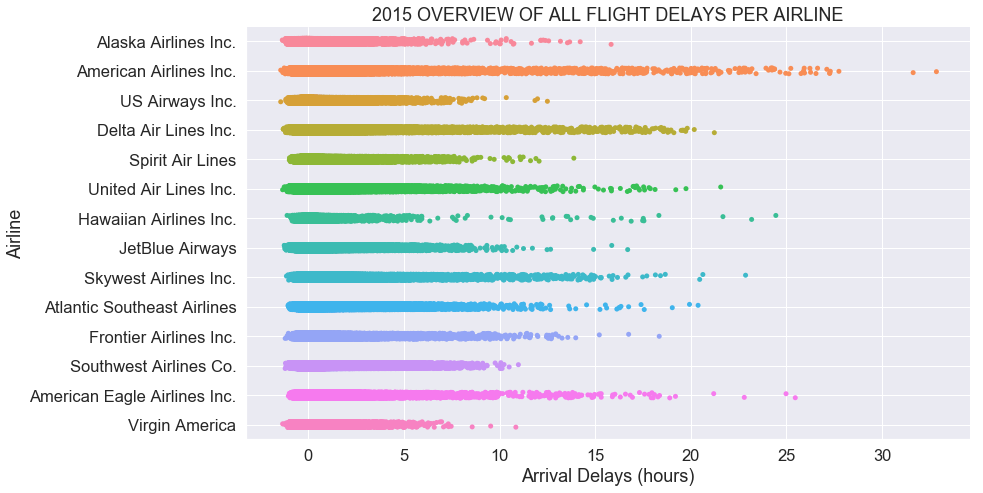

CPU times: user 1min 41s, sys: 3.81 s, total: 1min 44s
Wall time: 2min


In [20]:
%%time

# to plot all the existing arrival delays per airline
sns.set(style="dark", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plotDelays = sns.catplot(x="ARRIVAL_DELAY", y="AIRLINE", data=datasetAllFlightsPLOT, height=7, aspect=2.0, jitter=True) # to define which dataset to use on which axes
plotDelays = plotDelays.set(xlabel='Arrival Delays (hours)', ylabel='Airline') # to name the axes
plotDelays.ax.set_title("2015 OVERVIEW OF ALL FLIGHT DELAYS PER AIRLINE") # to add a title
plotDelays.ax.grid(b=True) # to see grid lines
plt.show() # to plot

### 2. Which airports typically have significant flight delays?

In [21]:
# using the groupby function again
airportStats = datasetAllFlights.groupby('ORIGIN')['STATUS'].value_counts()
airportStats = airportStats.drop(labels='on time', level=1) # to drop 2nd level label "on time" from this pandas multiIndex series
airportStats.index = airportStats.index.get_level_values(0) # to set the first index as the main index (and drop the STATUS index)
airportStats = pd.DataFrame(airportStats) # to convert to a dataframe
airportStats['ORIGIN'] = airportStats.index # to turn the dataset index into a column
airportStats = airportStats[['ORIGIN', 'STATUS']] # to reorder columns
airportStats = airportStats.replace({"ORIGIN": airportNames}) # to replace the airline codes with their names

# to sort the values
airportStats = airportStats.sort_values(by='STATUS', ascending=False) # to sort the dataframe by the status column
airportStats = airportStats.reset_index(drop=True) # to reindex starting at 0
airportStats = airportStats.head(n=30) # to only keep the first 30 records in the dataset

# to view results
print("The 10 airports with the most flight delays are:")
display(airportStats.head(10))


# NOTE
# DID NOT DO RATIOS HERE, because airports have many more flights than the ones in this dataset (US only vs international flights: many more flights, many more airlines).

The 10 airports with the most flight delays are:


,ORIGIN,STATUS
0,Chicago O'Hare International Airport,66663
1,Hartsfield-Jackson Atlanta International Airport,56462
2,Dallas/Fort Worth International Airport,50478
3,Denver International Airport,43331
4,Los Angeles International Airport,40281
5,George Bush Intercontinental Airport,30690
6,San Francisco International Airport,29534
7,Phoenix Sky Harbor International Airport,27427
8,McCarran International Airport,27225
9,LaGuardia Airport (Marine Air Terminal),22709


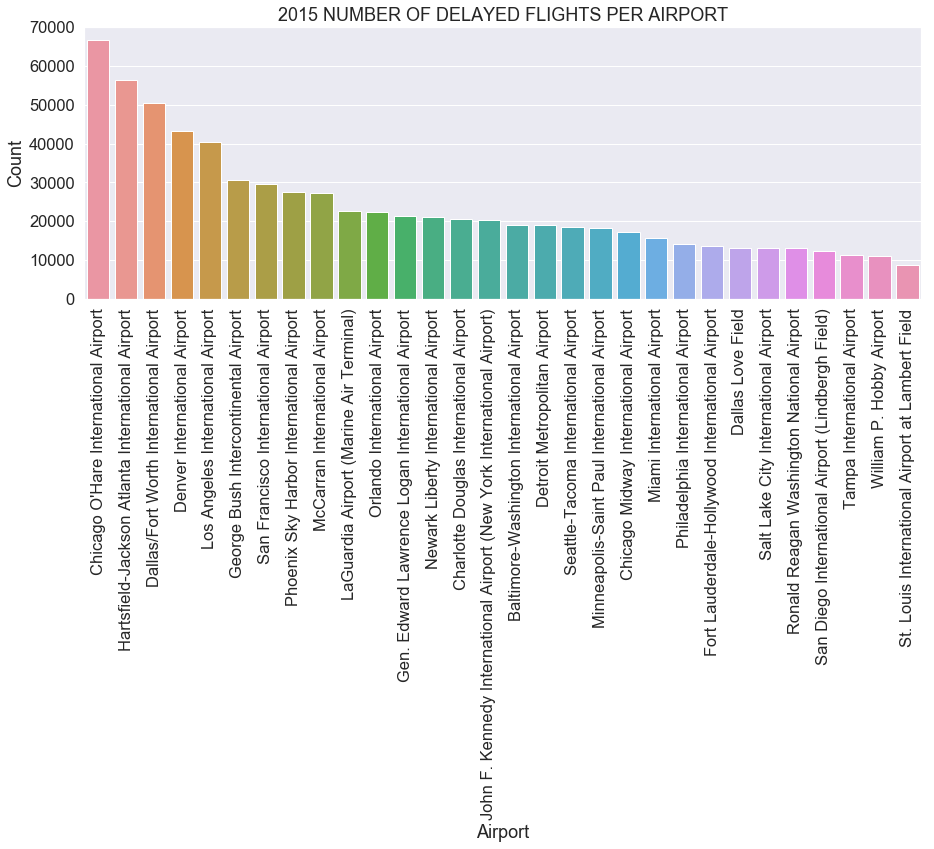

In [22]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,5)) # to change size of graph
sns.barplot(x=airportStats['ORIGIN'], y=airportStats['STATUS']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Airport') # to name x label
plt.ylabel('Count') # to name y label
plt.title('2015 NUMBER OF DELAYED FLIGHTS PER AIRPORT') # to add a title to plot
plt.show() # to plot

### 3. Which time of year, month, and day typically have the most flight delays?

#### MONTHS

In [23]:
# MONTHS

# using the groupby function
monthStats = datasetAllFlights.groupby('MONTH')['STATUS'].value_counts()
monthStats = pd.DataFrame(monthStats) # to convert to a dataframe
monthStats.rename(columns={'STATUS':'COUNT'}, inplace=True) # to rename STATUS column
monthStats.reset_index(inplace=True) # to convert indices to columns

# creating a pivot table for ratios
monthStatsPIVOT = monthStats.pivot(index='MONTH', columns='STATUS', values='COUNT')
monthStatsPIVOT.reset_index(inplace=True) # to turn index into first column
monthStatsPIVOT = monthStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "STATUS" HERE??????
monthStatsPIVOT['fequency of delayed flights'] = monthStatsPIVOT['delayed']/monthStatsPIVOT['on time'] # to add a column computing the frequency
monthStatsPIVOT['fequency of delayed flights'] = monthStatsPIVOT['fequency of delayed flights'].round(2) # to round the values

# to replace the month numbers with their names in both datasets
monthDictionary = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
monthStats = monthStats.replace({"MONTH": monthDictionary}) # dataset 1
monthStatsPIVOT = monthStatsPIVOT.replace({"MONTH": monthDictionary}) # dataset 2

# to show results
display(monthStats.head(2))
display(monthStatsPIVOT.head(2))

,MONTH,STATUS,COUNT
0,Jan,on time,361062
1,Jan,delayed,95951


STATUS,MONTH,delayed,on time,fequency of delayed flights
0,Jan,95951,361062,0.27
1,Feb,95179,312484,0.30


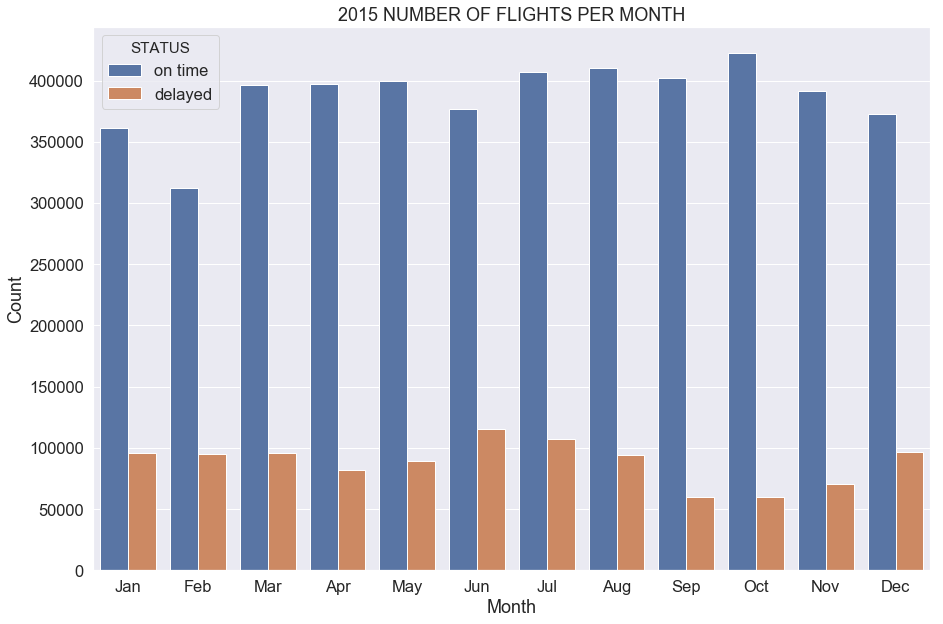

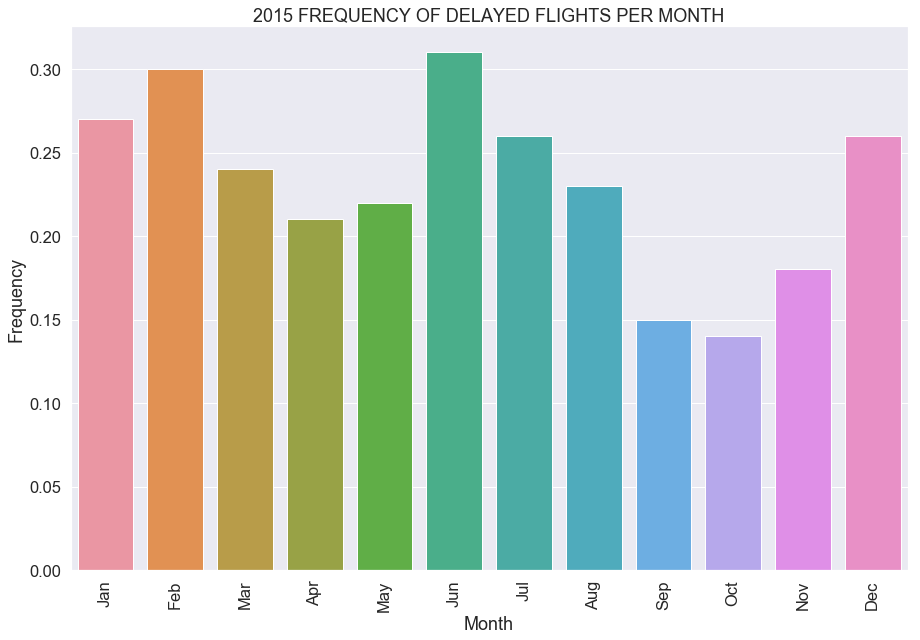

In [24]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='MONTH', y='COUNT', hue='STATUS', data=monthStats)
ax.set(xlabel='Month', ylabel='Count') # to name the axes
ax.set_title("2015 NUMBER OF FLIGHTS PER MONTH") # to add a title
plt.show() # to plot

# to plot the results above (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=monthStatsPIVOT['MONTH'], y=monthStatsPIVOT['fequency of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Month') # to name x label
plt.ylabel('Frequency') # to name y label
plt.title('2015 FREQUENCY OF DELAYED FLIGHTS PER MONTH') # to add a title to plot
plt.show() # to plot

#### DAYS

In [25]:
# DAYS

# using the groupby function
dayStats = datasetAllFlights.groupby('DAY')['STATUS'].value_counts()
dayStats = pd.DataFrame(dayStats) # to convert to a dataframe
dayStats.rename(columns={'STATUS':'COUNT'}, inplace=True) # to rename STATUS column
dayStats.reset_index(inplace=True) # to convert indices to columns

# creating a pivot table for ratios
dayStatsPIVOT = dayStats.pivot(index='DAY', columns='STATUS', values='COUNT')
dayStatsPIVOT.reset_index(inplace=True) # to turn index into first column
dayStatsPIVOT = dayStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "STATUS" HERE??????
dayStatsPIVOT['fequency of delayed flights'] = dayStatsPIVOT['delayed']/dayStatsPIVOT['on time'] # to add a column computing the frequency
dayStatsPIVOT['fequency of delayed flights'] = dayStatsPIVOT['fequency of delayed flights'].round(2) # to round the values

# to show results
display(dayStats.head(2))
display(dayStatsPIVOT.head(2))

,DAY,STATUS,COUNT
0,1,on time,147376
1,1,delayed,36198


STATUS,DAY,delayed,on time,fequency of delayed flights
0,1,36198,147376,0.25
1,2,40966,149548,0.27


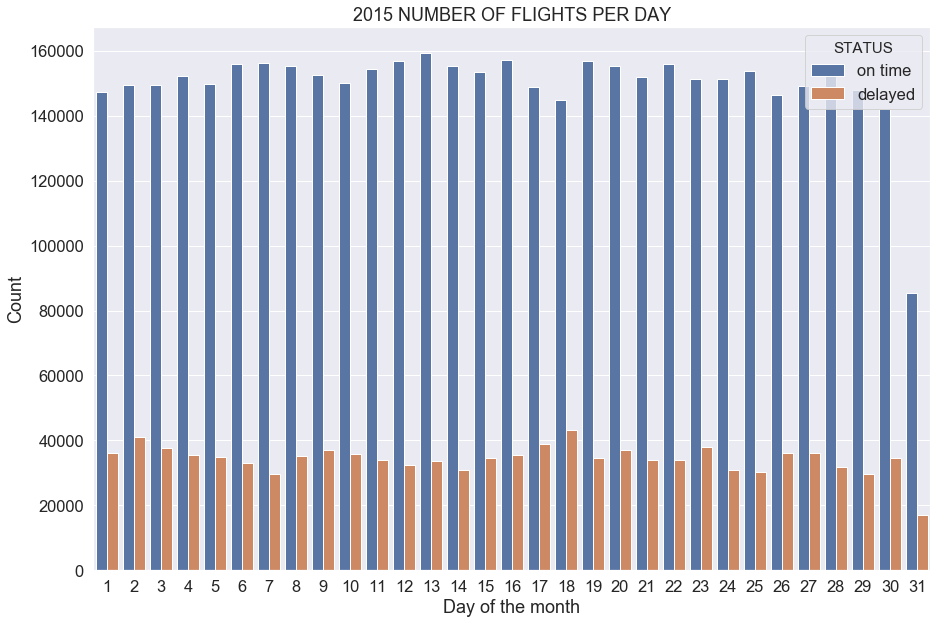

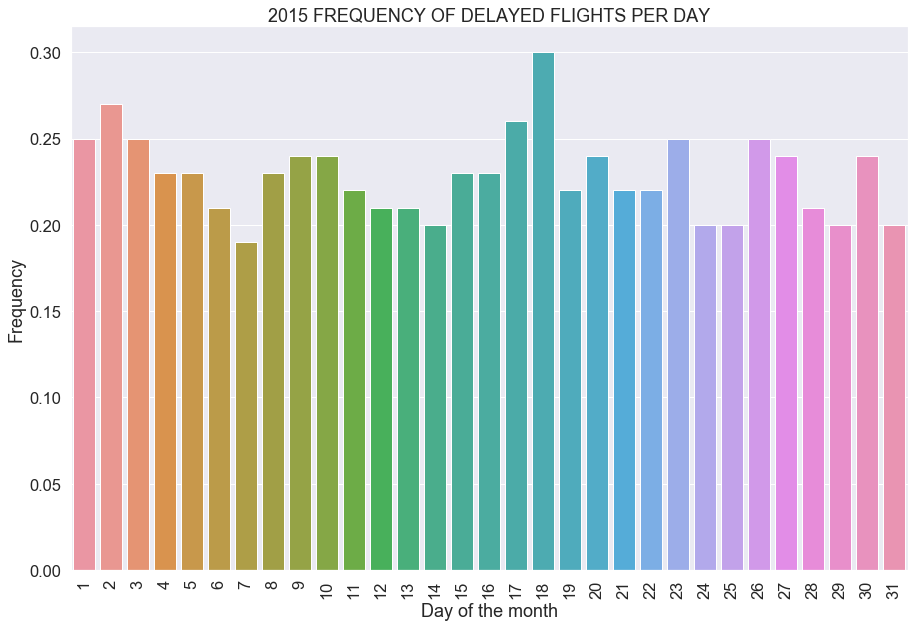

In [26]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='DAY', y='COUNT', hue='STATUS', data=dayStats)
ax.set(xlabel='Day of the month', ylabel='Count') # to name the axes
ax.set_title("2015 NUMBER OF FLIGHTS PER DAY") # to add a title
plt.show() # to plot

# to plot the results above (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=dayStatsPIVOT['DAY'], y=dayStatsPIVOT['fequency of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Day of the month') # to name x label
plt.ylabel('Frequency') # to name y label
plt.title('2015 FREQUENCY OF DELAYED FLIGHTS PER DAY') # to add a title to plot
plt.show() # to plot

#### TIME OF DAY

In [27]:
# TIME OF DAY

# using the groupby function
timeStats = datasetAllFlights.groupby('SCHEDULED_DEPARTURE')['STATUS'].value_counts()
timeStats = pd.DataFrame(timeStats) # to convert to a dataframe
timeStats.rename(columns={'STATUS':'COUNT'}, inplace=True) # to rename STATUS column
timeStats.reset_index(inplace=True) # to convert indices to columns

# creating a pivot table for ratios
timeStatsPIVOT = timeStats.pivot(index='SCHEDULED_DEPARTURE', columns='STATUS', values='COUNT')
timeStatsPIVOT.reset_index(inplace=True) # to turn index into first column
timeStatsPIVOT = timeStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "STATUS" HERE??????
timeStatsPIVOT['fequency of delayed flights'] = timeStatsPIVOT['delayed']/timeStatsPIVOT['on time'] # to add a column computing the frequency
timeStatsPIVOT['fequency of delayed flights'] = timeStatsPIVOT['fequency of delayed flights'].round(2) # to round the values

# to show results
display(timeStats.head(2))
display(timeStatsPIVOT.head(4))

,SCHEDULED_DEPARTURE,STATUS,COUNT
0,night,on time,223961
1,night,delayed,21518


STATUS,SCHEDULED_DEPARTURE,delayed,on time,fequency of delayed flights
0,night,21518,223961,0.10
1,morning,287323,1864840,0.15
2,afternoon,445281,1649335,0.27
3,evening,309316,912433,0.34


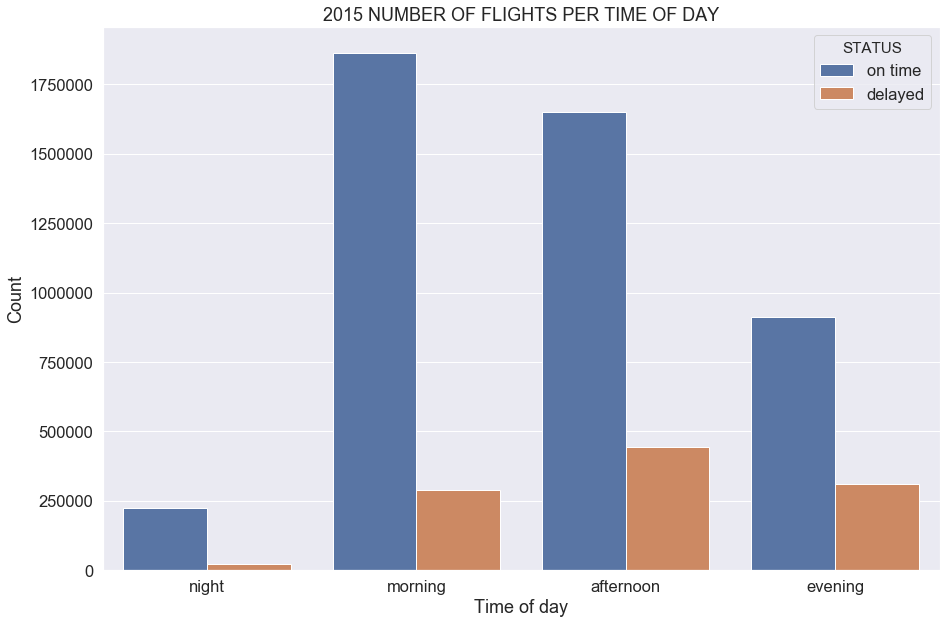

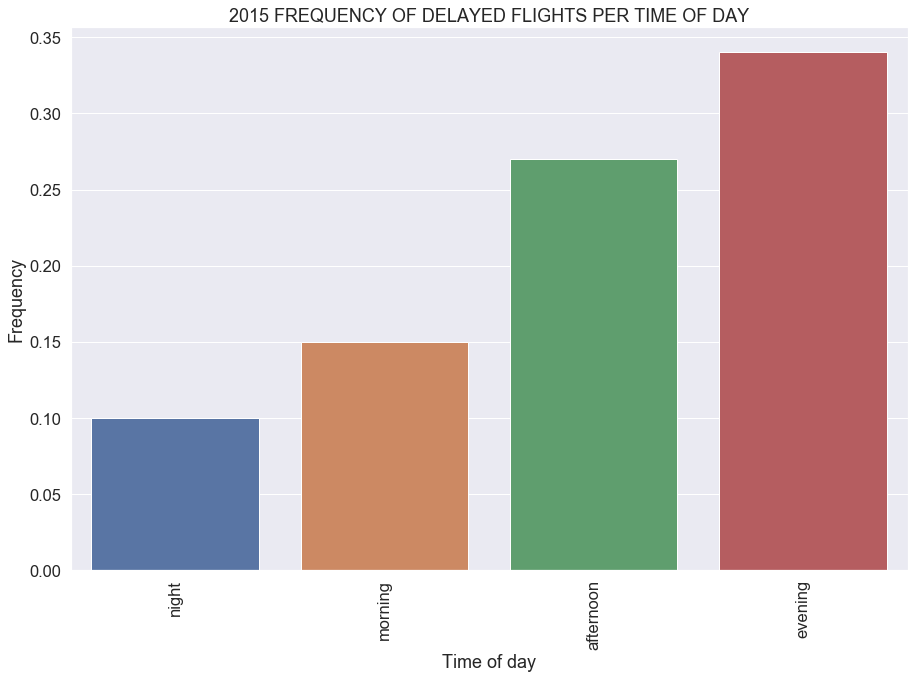

In [28]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='SCHEDULED_DEPARTURE', y='COUNT', hue='STATUS', data=timeStats)
ax.set(xlabel='Time of day', ylabel='Count') # to name the axes
ax.set_title("2015 NUMBER OF FLIGHTS PER TIME OF DAY") # to add a title
plt.show() # to plot

# to plot the results above (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=timeStatsPIVOT['SCHEDULED_DEPARTURE'], y=timeStatsPIVOT['fequency of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Time of day') # to name x label
plt.ylabel('Frequency') # to name y label
plt.title('2015 FREQUENCY OF DELAYED FLIGHTS PER TIME OF DAY') # to add a title to plot
plt.show() # to plot

### 4. Which day(s) of the week typically have the most flight delays?

#### DAY OF THE WEEK

In [29]:
# DAY OF THE WEEK

# using the groupby function
weekdayStats = datasetAllFlights.groupby('DAY_OF_WEEK')['STATUS'].value_counts()
weekdayStats = pd.DataFrame(weekdayStats) # to convert to a dataframe
weekdayStats.rename(columns={'STATUS':'COUNT'}, inplace=True) # to rename STATUS column
weekdayStats.reset_index(inplace=True) # to convert indices to columns

# creating a pivot table for ratios
weekdayStatsPIVOT = weekdayStats.pivot(index='DAY_OF_WEEK', columns='STATUS', values='COUNT')
weekdayStatsPIVOT.reset_index(inplace=True) # to turn index into first column
weekdayStatsPIVOT = weekdayStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "STATUS" HERE??????
weekdayStatsPIVOT['fequency of delayed flights'] = weekdayStatsPIVOT['delayed']/weekdayStatsPIVOT['on time'] # to add a column computing the frequency
weekdayStatsPIVOT['fequency of delayed flights'] = weekdayStatsPIVOT['fequency of delayed flights'].round(2) # to round the values

# to replace the weekday numbers with their names in both datasets
weekdayDictionary = {1 : "Mon", 2 : "Tue", 3 : "Wed", 4 : "Thu", 5 : "Fri", 6 : "Sat", 7 : "Sun"}
weekdayStats = weekdayStats.replace({"DAY_OF_WEEK": weekdayDictionary}) # dataset 1
weekdayStatsPIVOT = weekdayStatsPIVOT.replace({"DAY_OF_WEEK": weekdayDictionary}) # dataset 2


# to show results
display(weekdayStats.head(2))
display(weekdayStatsPIVOT.head(10))

,DAY_OF_WEEK,STATUS,COUNT
0,Mon,on time,675528
1,Mon,delayed,166266


STATUS,DAY_OF_WEEK,delayed,on time,fequency of delayed flights
0,Mon,166266,675528,0.25
1,Tue,151183,676216,0.22
2,Wed,153604,689638,0.22
3,Thu,171692,686194,0.25
4,Fri,163441,687946,0.24
5,Sat,110314,579430,0.19
6,Sun,146938,655617,0.22


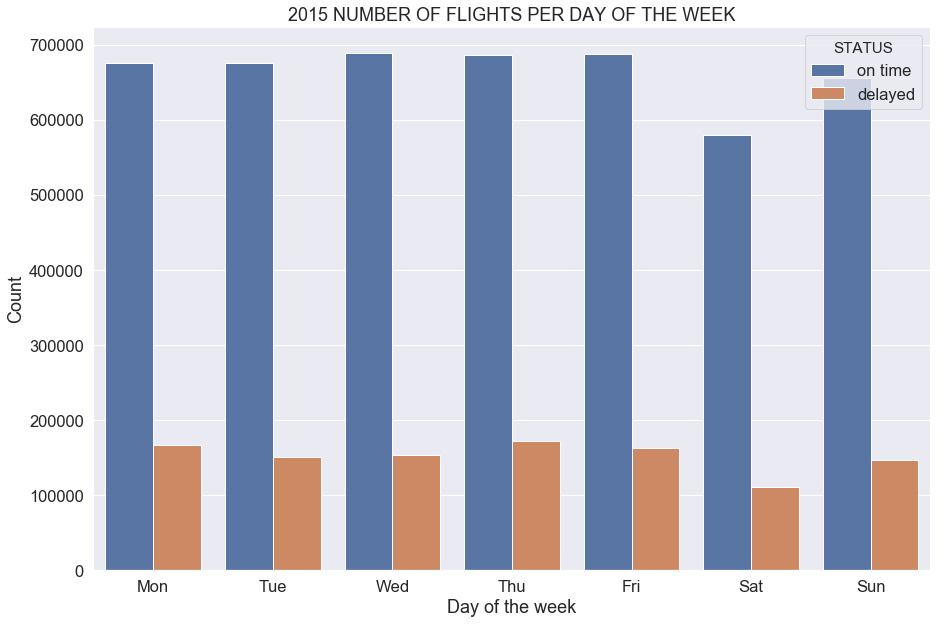

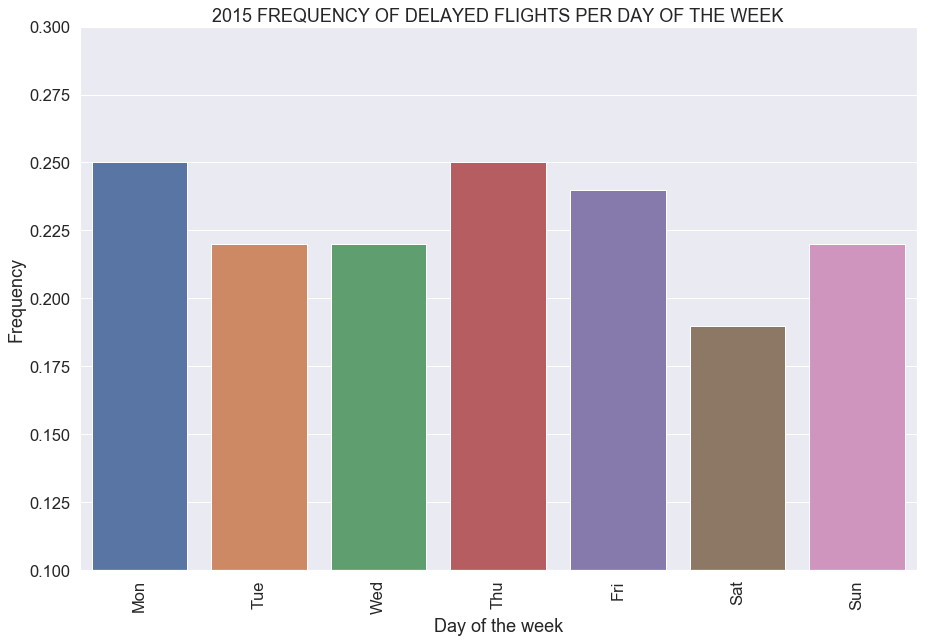

In [30]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='DAY_OF_WEEK', y='COUNT', hue='STATUS', data=weekdayStats)
ax.set(xlabel='Day of the week', ylabel='Count') # to name the axes
ax.set_title("2015 NUMBER OF FLIGHTS PER DAY OF THE WEEK") # to add a title
plt.show() # to plot

# to plot the results above (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=weekdayStatsPIVOT['DAY_OF_WEEK'], y=weekdayStatsPIVOT['fequency of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Day of the week') # to name x label
plt.ylabel('Frequency') # to name y label
plt.title('2015 FREQUENCY OF DELAYED FLIGHTS PER DAY OF THE WEEK') # to add a title to plot
plt.ylim(0.10, 0.3) ############### TO LIMIT THE Y-AXIS TO SEE SMALL DIFFERENCES BETTER
plt.show() # to plot

### 5. Which flight distance range shows the largest number of flight delays?

#### FLIGHT DISTANCE RANGE

In [31]:
# FLIGHT DISTANCE RANGE

# using the groupby function
distanceStats = datasetAllFlights.groupby('FLIGHT_DISTANCE')['STATUS'].value_counts()
distanceStats = pd.DataFrame(distanceStats) # to convert to a dataframe
distanceStats.rename(columns={'STATUS':'COUNT'}, inplace=True) # to rename STATUS column
distanceStats.reset_index(inplace=True) # to convert indices to columns

# creating a pivot table for ratios
distanceStatsPIVOT = distanceStats.pivot(index='FLIGHT_DISTANCE', columns='STATUS', values='COUNT')
distanceStatsPIVOT.reset_index(inplace=True) # to turn index into first column
distanceStatsPIVOT = distanceStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "STATUS" HERE??????
distanceStatsPIVOT['fequency of delayed flights'] = distanceStatsPIVOT['delayed']/distanceStatsPIVOT['on time'] # to add a column computing the frequency
distanceStatsPIVOT['fequency of delayed flights'] = distanceStatsPIVOT['fequency of delayed flights'].round(2) # to round the values

# to show results
display(distanceStats.head(2))
display(distanceStatsPIVOT.head(2))

,FLIGHT_DISTANCE,STATUS,COUNT
0,0-500,on time,1707218
1,0-500,delayed,379828


STATUS,FLIGHT_DISTANCE,delayed,on time,fequency of delayed flights
0,0-500,379828,1707218,0.22
1,500-1000,373799,1629095,0.23


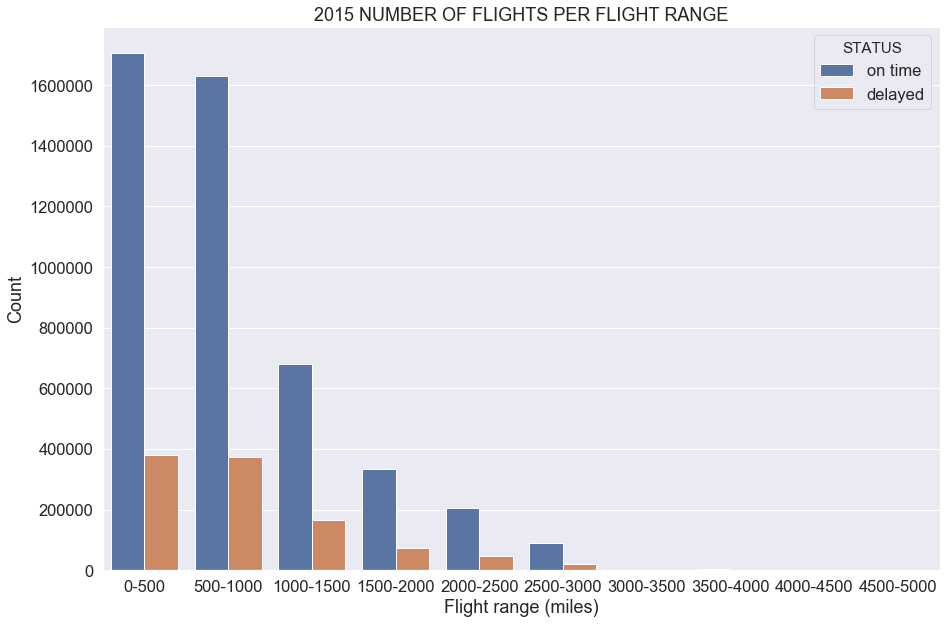

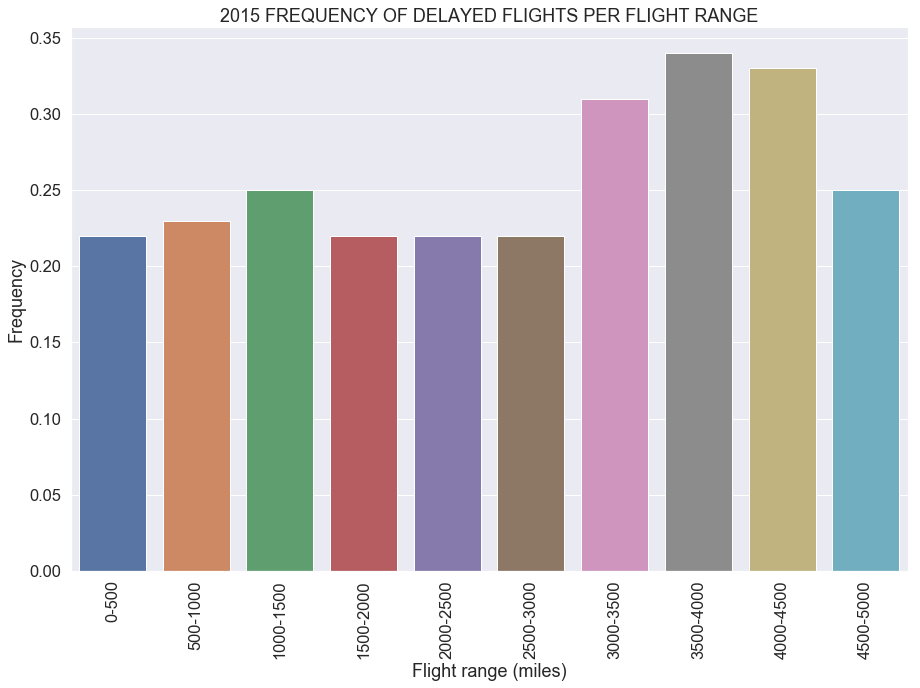

In [32]:
# to plot the results above
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='FLIGHT_DISTANCE', y='COUNT', hue='STATUS', data=distanceStats)
ax.set(xlabel='Flight range (miles)', ylabel='Count') # to name the axes
ax.set_title("2015 NUMBER OF FLIGHTS PER FLIGHT RANGE") # to add a title
plt.show() # to plot

# to plot the results above (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)
plt.figure(figsize=(15,10)) # to change size of graph
sns.barplot(x=distanceStatsPIVOT['FLIGHT_DISTANCE'], y=distanceStatsPIVOT['fequency of delayed flights']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Flight range (miles)') # to name x label
plt.ylabel('Frequency') # to name y label
plt.title('2015 FREQUENCY OF DELAYED FLIGHTS PER FLIGHT RANGE') # to add a title to plot
plt.show() # to plot

### 6. What are the statistics of the most common delay reasons? What are the top cancellation reasons?

In [33]:
# to compute the average of the main delay reasons considering all flights

airsystemDelay = datasetFlightsDelayReasons['AIR_SYSTEM_D'].mean()
print("For delayed flights in 2015, the average air system delay was", round(airsystemDelay, 2), "mins.")

securityDelay = datasetFlightsDelayReasons['SECURITY_D'].mean()
print("For delayed flights in 2015, the average security delay was", round(securityDelay, 2), "mins.")

airlineDelay = datasetFlightsDelayReasons['AIRLINE_D'].mean()
print("For delayed flights in 2015, the average airline delay was", round(airlineDelay, 2), "mins.")

lateaircraftDelay = datasetFlightsDelayReasons['LATE_AIRCRAFT_D'].mean()
print("For delayed flights in 2015, the average late aircraft delay was", round(lateaircraftDelay, 2), "mins.")

weatherDelay = datasetFlightsDelayReasons['WEATHER_D'].mean()
print("For delayed flights in 2015, the average weather delay was", round(weatherDelay, 2), "mins.")

For delayed flights in 2015, the average air system delay was 13.48 mins.
For delayed flights in 2015, the average security delay was 0.08 mins.
For delayed flights in 2015, the average airline delay was 18.97 mins.
For delayed flights in 2015, the average late aircraft delay was 23.47 mins.
For delayed flights in 2015, the average weather delay was 2.92 mins.


In [34]:
# to see the main cancellation reasons considering all flights


# using the groupby function to show cancellation by reason
CancellationGeneralStats = datasetFlightsCancellationReasons['CANCELLATION_REASON'].value_counts()
CancellationGeneralStats = pd.DataFrame(CancellationGeneralStats)
CancellationGeneralStats.reset_index(inplace=True) # to convert indices to columns

# using the groupby function to show cancellation by reason and by month
CancellationStats = datasetFlightsCancellationReasons.groupby('MONTH')['CANCELLATION_REASON'].value_counts()
CancellationStats = pd.DataFrame(CancellationStats) # to convert to a dataframe
CancellationStats.rename(columns={'CANCELLATION_REASON':'COUNT'}, inplace=True) # to rename STATUS column
CancellationStats.reset_index(inplace=True) # to convert indices to columns


##############################################################################################################
# creating a pivot table for ratios
CancellationStatsPIVOT = CancellationStats.pivot(index='MONTH', columns='CANCELLATION_REASON', values='COUNT')
CancellationStatsPIVOT.reset_index(inplace=True) # to turn index into first column
CancellationStatsPIVOT = CancellationStatsPIVOT.reset_index(drop=True) # to reindex starting at 0
# NEED TO DROP "CANCELLATION REASON" FIRST COLUMN HERE??????
CancellationStatsPIVOT['security'] = CancellationStatsPIVOT['security'].fillna(0) # to replace missing data from COUNT with 0's (since some months did not have security delays)

# to compute frequencies
CancellationStatsPIVOT['total cancellations'] = (CancellationStatsPIVOT['airline/carrier']+CancellationStatsPIVOT['national air system']+CancellationStatsPIVOT['security']+CancellationStatsPIVOT['weather'])

CancellationStatsPIVOT['fequency of airline/carrier cancellations'] = CancellationStatsPIVOT['airline/carrier']/CancellationStatsPIVOT['total cancellations']
CancellationStatsPIVOT['fequency of airline/carrier cancellations'] = CancellationStatsPIVOT['fequency of airline/carrier cancellations'].round(2) # to round the values

CancellationStatsPIVOT['fequency of national air system cancellations'] = CancellationStatsPIVOT['national air system']/CancellationStatsPIVOT['total cancellations']
CancellationStatsPIVOT['fequency of national air system cancellations'] = CancellationStatsPIVOT['fequency of national air system cancellations'].round(2) # to round the values

CancellationStatsPIVOT['fequency of security cancellations'] = CancellationStatsPIVOT['security']/CancellationStatsPIVOT['total cancellations']
CancellationStatsPIVOT['fequency of security cancellations'] = CancellationStatsPIVOT['fequency of security cancellations'].round(6) # to round the values (6 here because those values are so small)

CancellationStatsPIVOT['fequency of weather cancellations'] = CancellationStatsPIVOT['weather']/CancellationStatsPIVOT['total cancellations']
CancellationStatsPIVOT['fequency of weather cancellations'] = CancellationStatsPIVOT['fequency of weather cancellations'].round(2) # to round the values

# to drop columns that are not needed anymore and only keep the frequencies
CancellationStatsPIVOT = CancellationStatsPIVOT.drop('airline/carrier', axis=1)
CancellationStatsPIVOT = CancellationStatsPIVOT.drop('national air system', axis=1)
CancellationStatsPIVOT = CancellationStatsPIVOT.drop('security', axis=1)
CancellationStatsPIVOT = CancellationStatsPIVOT.drop('weather', axis=1)
CancellationStatsPIVOT = CancellationStatsPIVOT.drop('total cancellations', axis=1)

# to melt the dataset and get the format right for plotting
CancellationStatsPIVOT = pd.melt(CancellationStatsPIVOT, id_vars="MONTH", var_name="reason", value_name="frequency")
##############################################################################################################



# to replace the month numbers with their names in both datasets
monthDictionary = {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun", 7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
CancellationStats = CancellationStats.replace({"MONTH": monthDictionary}) # dataset 1
CancellationStatsPIVOT = CancellationStatsPIVOT.replace({"MONTH": monthDictionary}) # dataset 2

# to show results
display(CancellationGeneralStats)
display(CancellationStats.head(2))
display(CancellationStatsPIVOT.head(2))

,index,CANCELLATION_REASON
0,weather,48851
1,airline/carrier,25262
2,national air system,15749
3,security,22


,MONTH,CANCELLATION_REASON,COUNT
0,Jan,weather,7020
1,Jan,airline/carrier,2874


,MONTH,reason,frequency
0,Jan,fequency of airline/carrier cancellations,0.24
1,Feb,fequency of airline/carrier cancellations,0.14


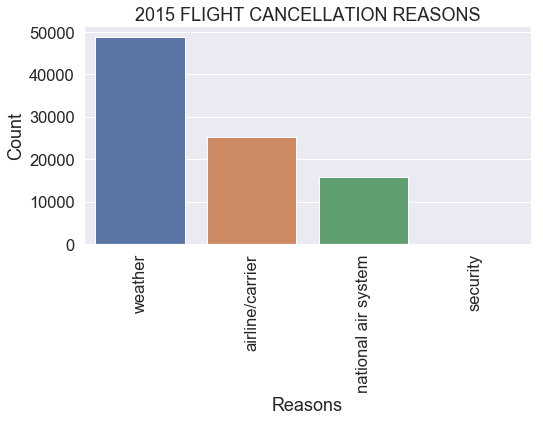

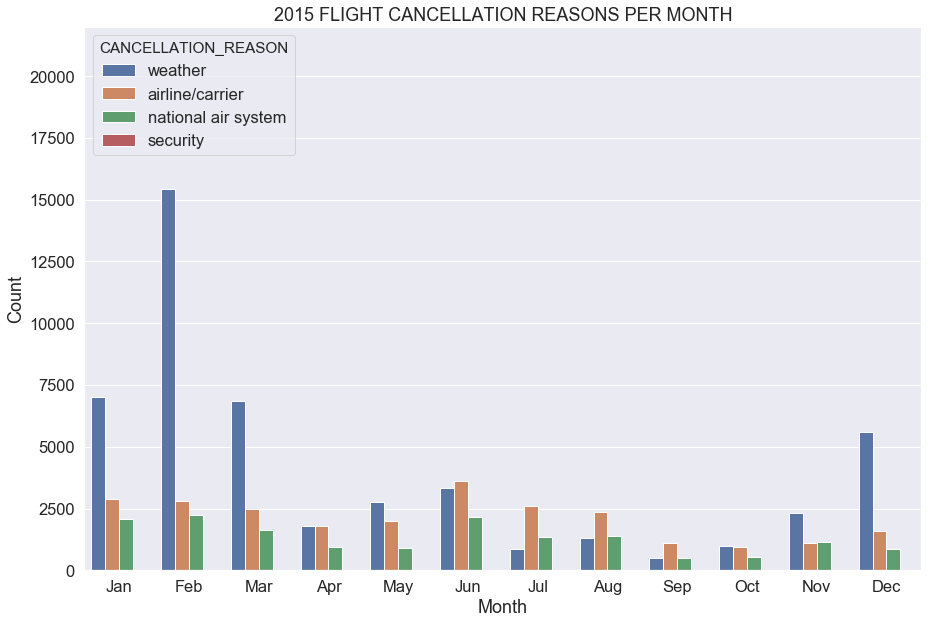

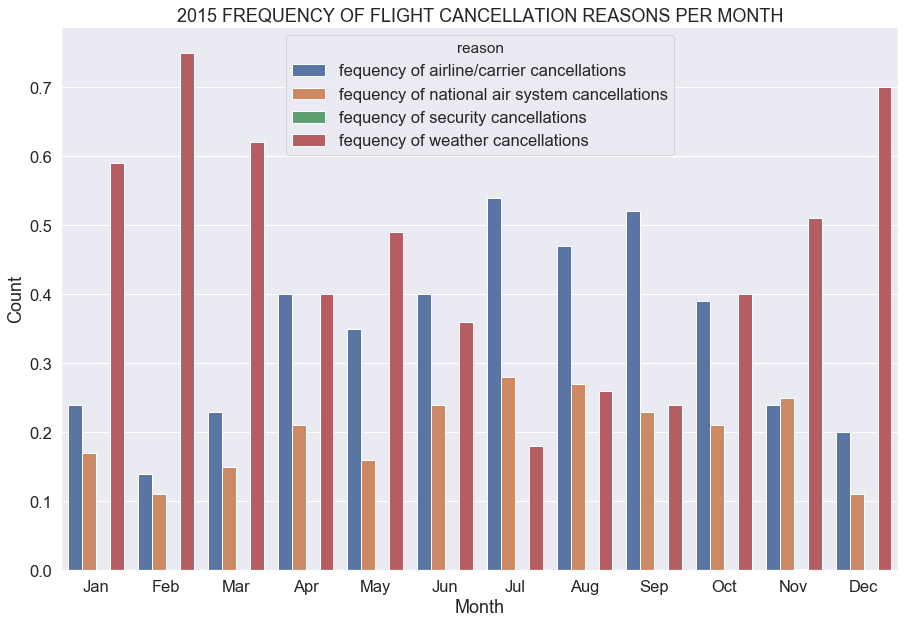

In [35]:
# to plot the results above (reason only)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(8,4)) # to change size of graph
sns.barplot(x=CancellationGeneralStats['index'], y=CancellationGeneralStats['CANCELLATION_REASON']) # to define x and y axis
plt.xticks(rotation= 90) # to rotate labels on x axis
plt.xlabel('Reasons') # to name x label
plt.ylabel('Count') # to name y label
plt.title('2015 FLIGHT CANCELLATION REASONS') # to add a title to plot
plt.show() # to plot


# to plot the results above (reason and month)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='MONTH', y='COUNT', hue='CANCELLATION_REASON', data=CancellationStats)
ax.set(xlabel='Month', ylabel='Count') # to name the axes
ax.set_title("2015 FLIGHT CANCELLATION REASONS PER MONTH") # to add a title
plt.ylim(0, 22000) ############### TO LIMIT THE Y-AXIS TO SEE SMALL DIFFERENCES BETTER
plt.show() # to plot


# to plot the results above (reason and month) (RATIOS)
sns.set(style="darkgrid", color_codes=True, font_scale=1.5) # to set the design settings of the plot (style refers to the the background style)
plt.figure(figsize=(15,10)) # to change size of plot
ax = sns.barplot(x='MONTH', y='frequency', hue='reason', data=CancellationStatsPIVOT)
ax.set(xlabel='Month', ylabel='Count') # to name the axes
ax.set_title("2015 FREQUENCY OF FLIGHT CANCELLATION REASONS PER MONTH") # to add a title
plt.show() # to plot

# IV. DATA PREDICTIVE ANALYSIS/MODELING

In [36]:
# to import relevant packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [37]:
# TO REFINE THE DATASET FOR MODELING

# to make a copy of our dataset
datasetMODELING = datasetAllFlights.copy()

# to get rid of columns we will not use for the model
datasetMODELING = datasetMODELING.drop('DEPARTURE_DELAY', axis=1)
datasetMODELING = datasetMODELING.drop('ARRIVAL_DELAY', axis=1)
datasetMODELING = datasetMODELING.drop('DESTINATION', axis=1)

### MODEL #1: THE 5 AIRPORTS THAT HAVE THE LARGEST NUMBER OF DELAYS vs. ALL AIRLINES

In [38]:
# to extract the 5 airports with the largest number of delays (see descriptive stats above)
datasetMODELING_ORD = datasetMODELING[datasetMODELING['ORIGIN'] == 'ORD'] # Chicago
datasetMODELING_ATL = datasetMODELING[datasetMODELING['ORIGIN'] == 'ATL'] # Atlanta
datasetMODELING_DFW = datasetMODELING[datasetMODELING['ORIGIN'] == 'DFW'] # Dallas
datasetMODELING_DEN = datasetMODELING[datasetMODELING['ORIGIN'] == 'DEN'] # Denver
datasetMODELING_LAX = datasetMODELING[datasetMODELING['ORIGIN'] == 'LAX'] # Los Angeles

# to create a new dataset combining those 5 airports
datasetMODELING_AIRPORTS = pd.concat([datasetMODELING_ORD, datasetMODELING_ATL, datasetMODELING_DFW, datasetMODELING_DEN, datasetMODELING_LAX])

# to split the data for modeling
X = datasetMODELING_AIRPORTS.drop('STATUS', axis=1) # X will only contain predictors
y = datasetMODELING_AIRPORTS['STATUS'] # y will only contain the predicted/target value

In [39]:
# to transform categorical variables to numeric

## LABEL ENCODER APPROACH: LabelEncoder converts categorical columns of strings into integers. Can be problematic as it could create a non-desired ordering.
## ONE HOT ENCODER APPROACH: OneHotEncoder takes the column of integers and encodes them as dummy variables 0 and 1 (and thus creates several columns per variable, equal to the number of categories)

        # USING THE LABEL ENCODER APPROACH 
#label_encoder = LabelEncoder()
#integer_encoded1 = label_encoder.fit_transform(X['FLIGHT_DISTANCE'])
#X['FLIGHT_DISTANCE'] = integer_encoded1
#integer_encoded2 = label_encoder.fit_transform(X['SCHEDULED_DEPARTURE'])
#X['SCHEDULED_DEPARTURE'] = integer_encoded2
#integer_encoded3 = label_encoder.fit_transform(X['SCHEDULED_ARRIVAL'])
#X['SCHEDULED_ARRIVAL'] = integer_encoded3
#integer_encoded4 = label_encoder.fit_transform(X['AIRLINE'])
#X['AIRLINE'] = integer_encoded4
#integer_encoded5 = label_encoder.fit_transform(X['ORIGIN'])
#X['ORIGIN'] = integer_encoded5
#integer_encoded6 = label_encoder.fit_transform(X['DESTINATION'])
#X['DESTINATION'] = integer_encoded6

        # USING THE ONE HOT ENCODER APPROACH (can be done with either OneHotEncoder from sklearn, or get_dummies from pandas)
X = pd.get_dummies(X)

# to view the new dataset with predictors only
X.head(5)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_ATL,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_LAX,ORIGIN_ORD,FLIGHT_DISTANCE_0-500,FLIGHT_DISTANCE_500-1000,FLIGHT_DISTANCE_1000-1500,FLIGHT_DISTANCE_1500-2000,FLIGHT_DISTANCE_2000-2500,FLIGHT_DISTANCE_2500-3000,FLIGHT_DISTANCE_3000-3500,FLIGHT_DISTANCE_3500-4000,FLIGHT_DISTANCE_4000-4500,FLIGHT_DISTANCE_4500-5000,SCHEDULED_DEPARTURE_night,SCHEDULED_DEPARTURE_morning,SCHEDULED_DEPARTURE_afternoon,SCHEDULED_DEPARTURE_evening,SCHEDULED_ARRIVAL_night,SCHEDULED_ARRIVAL_morning,SCHEDULED_ARRIVAL_afternoon,SCHEDULED_ARRIVAL_evening
56,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
63,1,1,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
89,1,1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
93,1,1,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
100,1,1,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [40]:
%%time

# to split the data into train and test datasets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state is the seed used by the random number generator

# to build the CLASSIFICATION model
model = RandomForestClassifier(n_estimators=100) # to use 100 trees
model.fit(X_train, y_train)

# to make predictions
y_pred = model.predict(X_test)

# to see accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# to run 5-fold CV on the model and see results
crossvalidation = cross_val_score(model, X_train, y_train, cv=5)
crossvalidation = crossvalidation.mean()
print("\n5-fold Cross Validation:", crossvalidation)

# to see confusion matrix
conMatrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(conMatrix)

# to see classification report
print("\nClassification Report")
print(classification_report(y_test, y_pred))


Accuracy: 0.8041051707705811

5-fold Cross Validation: 0.801500673518024

Confusion Matrix
[[ 23592  53404]
 [ 19358 275080]]

Classification Report
             precision    recall  f1-score   support

    delayed       0.55      0.31      0.39     76996
    on time       0.84      0.93      0.88    294438

avg / total       0.78      0.80      0.78    371434

CPU times: user 16min 9s, sys: 45 s, total: 16min 54s
Wall time: 20min 15s


### MODEL #2: THE AIRLINE WITH THE LARGEST NUMBER OF DELAYS vs. ALL AIRPORTS

In [41]:
# to extract the airline with the largest number of delays overall (see descriptive stats above) and make it a new dataset
datasetMODELING_AIRLINE = datasetMODELING[datasetMODELING['AIRLINE'] == 'WN'] # Southwest

# to split the data for modeling
X = datasetMODELING_AIRLINE.drop('STATUS', axis=1) # X will only contain predictors
y = datasetMODELING_AIRLINE['STATUS'] # y will only contain the predicted/target value

In [42]:
# to transform categorical variables to numeric

## LABEL ENCODER APPROACH: LabelEncoder converts categorical columns of strings into integers. Can be problematic as it could create a non-desired ordering.
## ONE HOT ENCODER APPROACH: OneHotEncoder takes the column of integers and encodes them as dummy variables 0 and 1 (and thus creates several columns per variable, equal to the number of categories)

        # USING THE LABEL ENCODER APPROACH 
#label_encoder = LabelEncoder()
#integer_encoded1 = label_encoder.fit_transform(X['FLIGHT_DISTANCE'])
#X['FLIGHT_DISTANCE'] = integer_encoded1
#integer_encoded2 = label_encoder.fit_transform(X['SCHEDULED_DEPARTURE'])
#X['SCHEDULED_DEPARTURE'] = integer_encoded2
#integer_encoded3 = label_encoder.fit_transform(X['SCHEDULED_ARRIVAL'])
#X['SCHEDULED_ARRIVAL'] = integer_encoded3
#integer_encoded4 = label_encoder.fit_transform(X['AIRLINE'])
#X['AIRLINE'] = integer_encoded4
#integer_encoded5 = label_encoder.fit_transform(X['ORIGIN'])
#X['ORIGIN'] = integer_encoded5
#integer_encoded6 = label_encoder.fit_transform(X['DESTINATION'])
#X['DESTINATION'] = integer_encoded6

        # USING THE ONE HOT ENCODER APPROACH (can be done with either OneHotEncoder from sklearn, or get_dummies from pandas)
X = pd.get_dummies(X)

# to view the new dataset with predictors only
X.head(2)

,MONTH,DAY,DAY_OF_WEEK,AIRLINE_WN,ORIGIN_10140,ORIGIN_10257,ORIGIN_10279,ORIGIN_10397,ORIGIN_10423,ORIGIN_10529,ORIGIN_10599,ORIGIN_10693,ORIGIN_10713,ORIGIN_10721,ORIGIN_10792,ORIGIN_10800,ORIGIN_10821,ORIGIN_10874,ORIGIN_10994,ORIGIN_11042,ORIGIN_11057,ORIGIN_11066,ORIGIN_11140,ORIGIN_11259,ORIGIN_11267,ORIGIN_11278,ORIGIN_11292,ORIGIN_11423,ORIGIN_11433,ORIGIN_11481,ORIGIN_11540,ORIGIN_11618,ORIGIN_11697,ORIGIN_11721,ORIGIN_11884,ORIGIN_11986,ORIGIN_11996,ORIGIN_12191,ORIGIN_12206,ORIGIN_12264,ORIGIN_12278,ORIGIN_12339,ORIGIN_12391,ORIGIN_12451,ORIGIN_12889,ORIGIN_12892,ORIGIN_12896,ORIGIN_12953,ORIGIN_12992,ORIGIN_13158,ORIGIN_13198,ORIGIN_13204,ORIGIN_13232,ORIGIN_13244,ORIGIN_13296,ORIGIN_13342,ORIGIN_13487,ORIGIN_13495,ORIGIN_13796,ORIGIN_13851,ORIGIN_13871,ORIGIN_13891,ORIGIN_13931,ORIGIN_14027,ORIGIN_14057,ORIGIN_14100,ORIGIN_14107,ORIGIN_14122,ORIGIN_14193,ORIGIN_14307,ORIGIN_14321,ORIGIN_14492,ORIGIN_14524,ORIGIN_14570,ORIGIN_14576,ORIGIN_14635,ORIGIN_14679,ORIGIN_14683,ORIGIN_14730,ORIGIN_14747,ORIGIN_14771,ORIGIN_14831,ORIGIN_14843,ORIGIN_14869,ORIGIN_14893,ORIGIN_14908,ORIGIN_15016,ORIGIN_15304,ORIGIN_15370,ORIGIN_15376,ORIGIN_ABQ,ORIGIN_ALB,ORIGIN_AMA,ORIGIN_ATL,ORIGIN_AUS,ORIGIN_BDL,ORIGIN_BHM,ORIGIN_BNA,ORIGIN_BOI,ORIGIN_BOS,ORIGIN_BUF,ORIGIN_BUR,ORIGIN_BWI,ORIGIN_CAK,ORIGIN_CHS,ORIGIN_CLE,ORIGIN_CLT,ORIGIN_CMH,ORIGIN_CRP,ORIGIN_DAL,ORIGIN_DAY,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DSM,ORIGIN_DTW,ORIGIN_ECP,ORIGIN_ELP,ORIGIN_EWR,ORIGIN_FLL,ORIGIN_FNT,ORIGIN_GEG,ORIGIN_GRR,ORIGIN_GSP,ORIGIN_HOU,ORIGIN_HRL,ORIGIN_IAD,ORIGIN_ICT,ORIGIN_IND,ORIGIN_ISP,ORIGIN_JAX,ORIGIN_LAS,ORIGIN_LAX,ORIGIN_LBB,ORIGIN_LGA,ORIGIN_LIT,ORIGIN_MAF,ORIGIN_MCI,ORIGIN_MCO,ORIGIN_MDW,ORIGIN_MEM,ORIGIN_MHT,ORIGIN_MKE,ORIGIN_MSP,ORIGIN_MSY,ORIGIN_OAK,ORIGIN_OKC,ORIGIN_OMA,ORIGIN_ONT,ORIGIN_ORF,ORIGIN_PBI,ORIGIN_PDX,ORIGIN_PHL,ORIGIN_PHX,ORIGIN_PIT,ORIGIN_PNS,ORIGIN_PVD,ORIGIN_PWM,ORIGIN_RDU,ORIGIN_RIC,ORIGIN_RNO,ORIGIN_ROC,ORIGIN_RSW,ORIGIN_SAN,ORIGIN_SAT,ORIGIN_SDF,ORIGIN_SEA,ORIGIN_SFO,ORIGIN_SJC,ORIGIN_SJU,ORIGIN_SLC,ORIGIN_SMF,ORIGIN_SNA,ORIGIN_STL,ORIGIN_TPA,ORIGIN_TUL,ORIGIN_TUS,FLIGHT_DISTANCE_0-500,FLIGHT_DISTANCE_500-1000,FLIGHT_DISTANCE_1000-1500,FLIGHT_DISTANCE_1500-2000,FLIGHT_DISTANCE_2000-2500,FLIGHT_DISTANCE_2500-3000,FLIGHT_DISTANCE_3000-3500,FLIGHT_DISTANCE_3500-4000,FLIGHT_DISTANCE_4000-4500,FLIGHT_DISTANCE_4500-5000,SCHEDULED_DEPARTURE_night,SCHEDULED_DEPARTURE_morning,SCHEDULED_DEPARTURE_afternoon,SCHEDULED_DEPARTURE_evening,SCHEDULED_ARRIVAL_night,SCHEDULED_ARRIVAL_morning,SCHEDULED_ARRIVAL_afternoon,SCHEDULED_ARRIVAL_evening
155,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
184,1,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [43]:
%%time

# to split the data into train and test datasets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # random_state is the seed used by the random number generator

# to build the CLASSIFICATION model
model = RandomForestClassifier(n_estimators=100) # to use 100 trees
model.fit(X_train, y_train)

# to make predictions
y_pred = model.predict(X_test)

# to see accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# to run 5-fold CV on the model and see results
crossvalidation = cross_val_score(model, X_train, y_train, cv=5)
crossvalidation = crossvalidation.mean()
print("\n5-fold Cross Validation:", crossvalidation)

# to see confusion matrix
conMatrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix")
print(conMatrix)

# to see classification report
print("\nClassification Report")
print(classification_report(y_test, y_pred))


Accuracy: 0.8038827970519504

5-fold Cross Validation: 0.8013400299107533

Confusion Matrix
[[ 19997  51042]
 [ 22055 279627]]

Classification Report
             precision    recall  f1-score   support

    delayed       0.48      0.28      0.35     71039
    on time       0.85      0.93      0.88    301682

avg / total       0.78      0.80      0.78    372721

CPU times: user 41min 43s, sys: 52.5 s, total: 42min 35s
Wall time: 43min 35s


## V. CONCLUSIONS

In [44]:
# accuracy on testing data is high with random forests in both machine learning experiments.
# thus, classification is successful


# net steps: 
# use logisitc regression and neural networks to compare relative peformance with random forests